In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('Churn_Modelling.csv')
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
colum=df.columns
print("Shape of Dataset : ",df.shape,"\n Columns in Datase :",colum)

Shape of Dataset :  (10000, 14) 
 Columns in Datase : Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


In [4]:
df=df.drop(columns=['RowNumber','CustomerId','Surname'])
colum=df.columns
print("Shape of Dataset : ",df.shape,"\n Final Remaning Columns in Datase :",colum)


Shape of Dataset :  (10000, 11) 
 Final Remaning Columns in Datase : Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')


In [5]:
from sklearn.preprocessing import LabelEncoder
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
data = pd.get_dummies(df, columns=['Geography'], drop_first=True)

In [6]:
x = data.drop('Exited', axis=1)
y = data['Exited']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [7]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=26,criterion='log_loss',max_depth=6)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

In [8]:
print("Final Random Forest Model Performance on Dataset")
print("     Accuracy of Model on Test data :", rf.score(x_test,y_test)*100," %")
print("     Accuracy of Model on Train data :",rf.score(x_train,y_train)*100," %")

Final Random Forest Model Performance on Dataset
     Accuracy of Model on Test data : 86.0  %
     Accuracy of Model on Train data : 86.6375  %


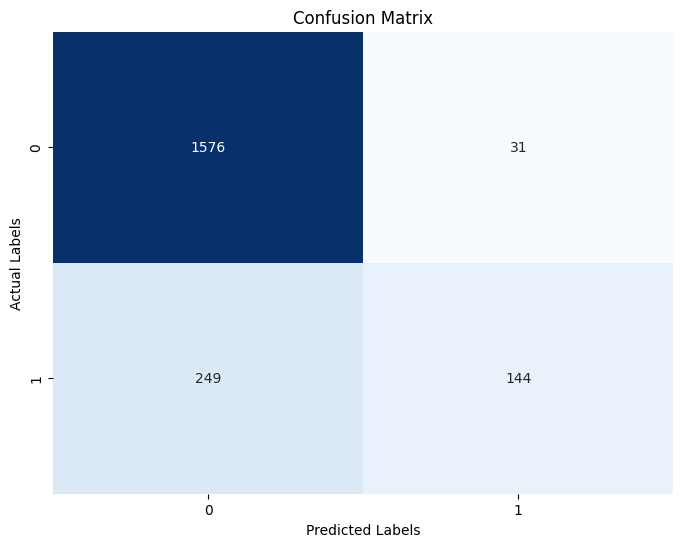

In [9]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm2 = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()
